# Context

Shop Customer Data is a detailed analysis of a imaginative shop's ideal customers. It helps a business to better understand its customers. The owner of a shop gets information about Customers through membership cards.

Dataset consists of 2000 records and 8 columns:

**Customer ID**

**Gender**

**Age**

**Annual Income**

**Spending Score - Score assigned by the shop, based on customer behavior and spending nature**

**Profession**

**Work Experience - in years**

**Family Size**

In [1]:
# importing libraries
# импорт библиотек

import pandas as pd
import numpy as np 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [3]:
# dataframe overview
# обзор датафрейма

df = pd.read_csv('/Users/karimalibekov/Desktop/python/PET PROJECTS/data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# dataframe info, dtypes
# информация о датафрейме, размер, тип колонок

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# checking missing values
# проверка пропущенных значений

missing_values = df.isnull().sum()

missing_values[missing_values > 0]

Series([], dtype: int64)

## Univariate Analysis

#### Одномерный анализ

In [6]:
# generate descriptive statistics
# формирование описательной статистики

df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


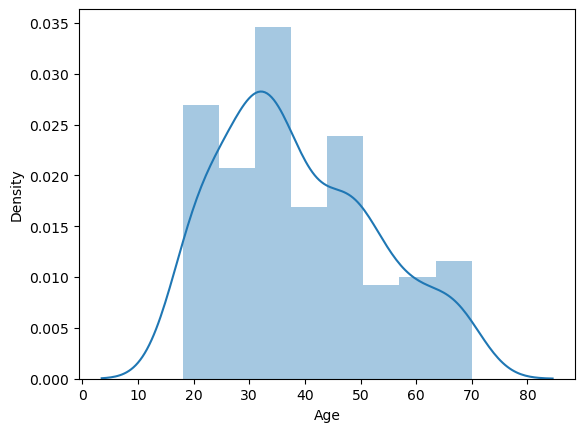

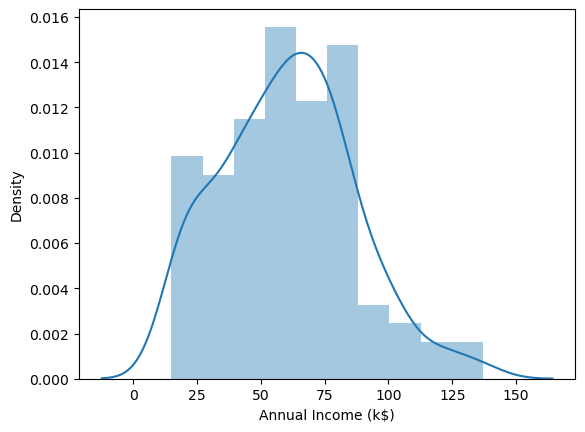

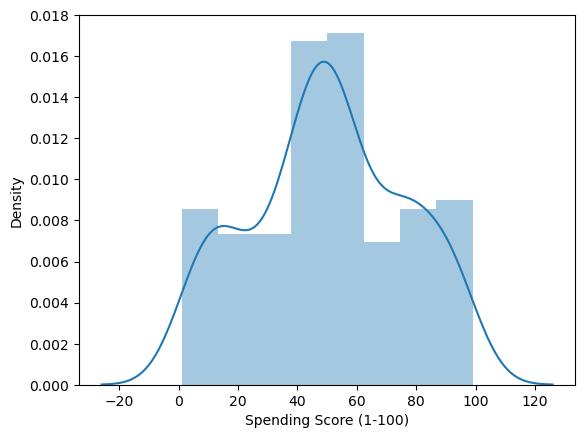

In [7]:
# distribution of numeric values
# распределение числовых значений

columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

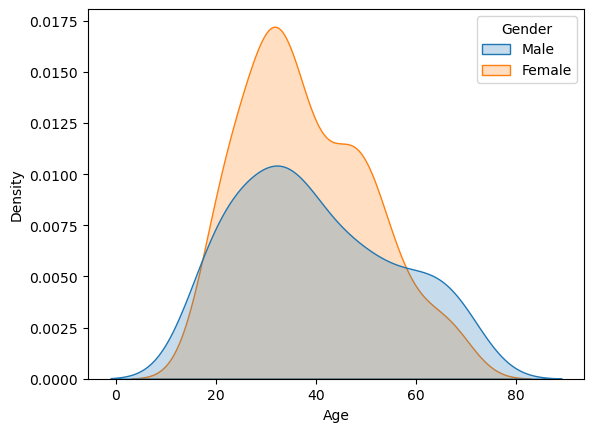

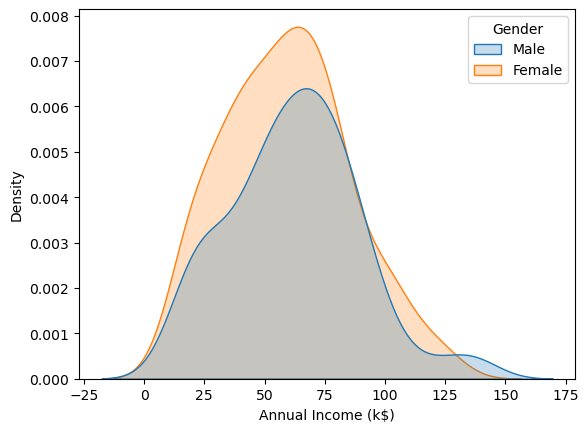

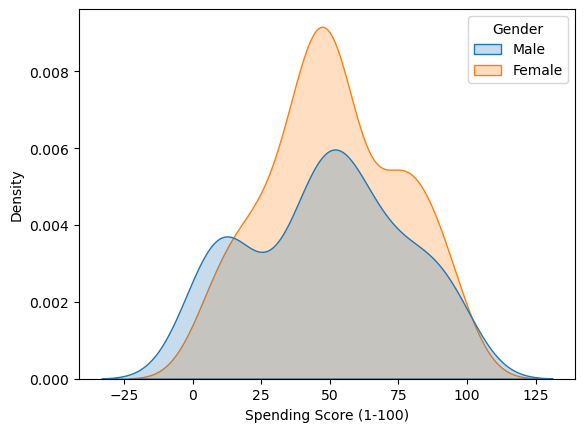

In [9]:
# distribution of numeric values with gender filter
# распределение числовых значений с фильтрацией по полу

columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(x=df[i], shade=True, hue=df.Gender)

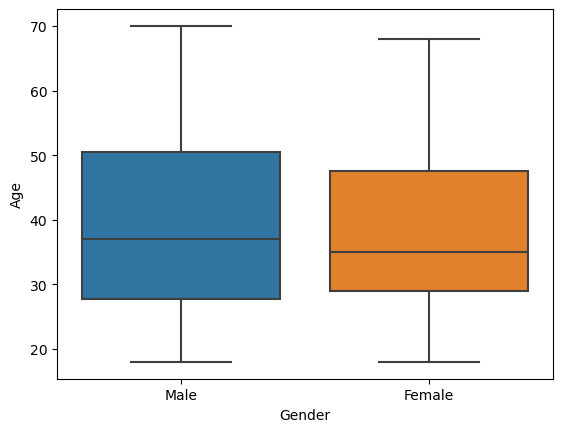

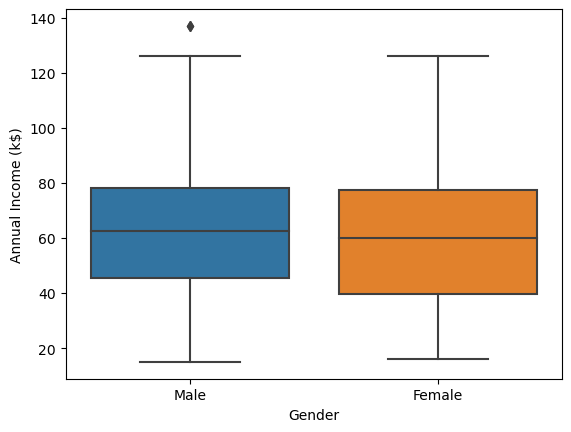

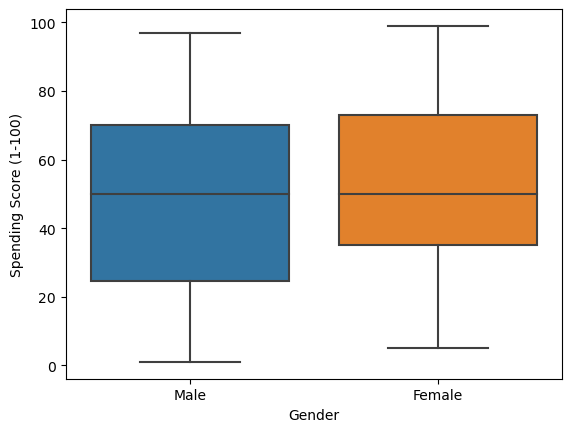

In [10]:
# boxplots of numeric values with gender filter
# ящик с усами для числовых переменных с фильтрацией по полу

columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[i])

In [11]:
# percentage of each gender
# процентное соотношение представителей каждого пола

df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate Analysis

#### Двумерный анализ

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

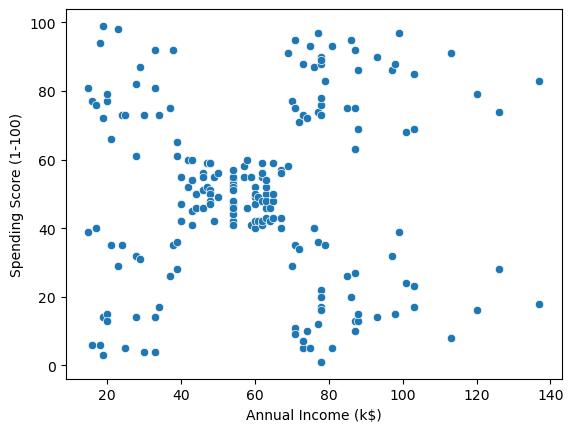

In [12]:
# creating scatterplot to visualize relation between annual income and spending score
# построение диаграммы рассеяния для визуализации зависимости между годовым доходом и показателем расходов

sns.scatterplot(data = df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [13]:
# duplicating df without CustomerID column
# дубликат исходного датафрейма без колонки CustomerID

df2 = df.drop('CustomerID', axis=1)

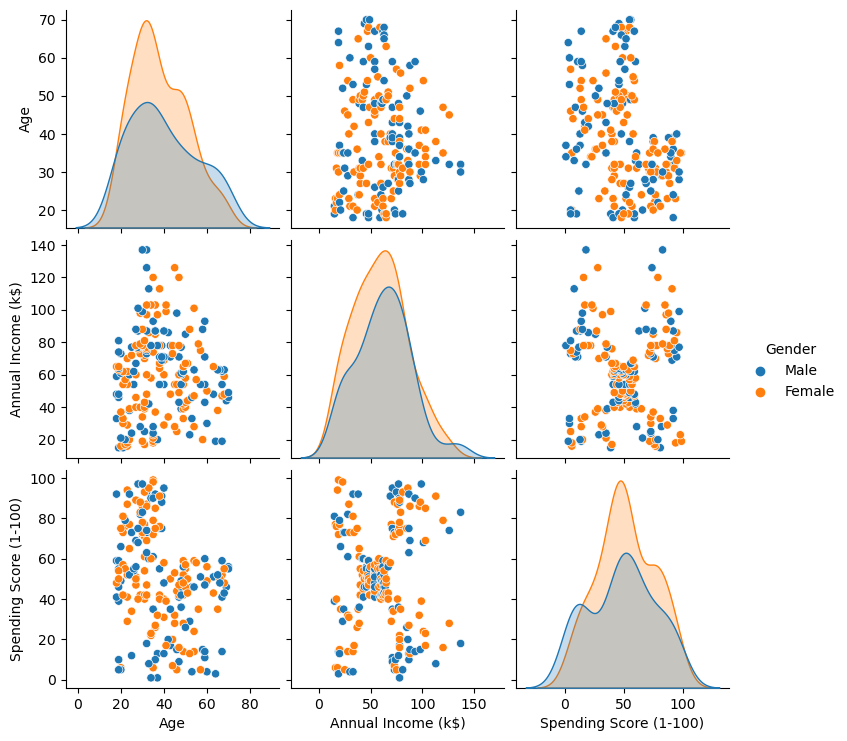

In [14]:
# creating pairplots between all numeric values with gender filtration
# создание парных графиков всех числовых переменных с фильтрацией по полу

sns.pairplot(df2, hue='Gender')

In [16]:
# mean numeric values for each gender
# средние числовые значения для каждого пола

df2.groupby('Gender', as_index=False)['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Female,38.098214,59.250000,51.526786
1,Male,39.806818,62.227273,48.511364


<Axes: >

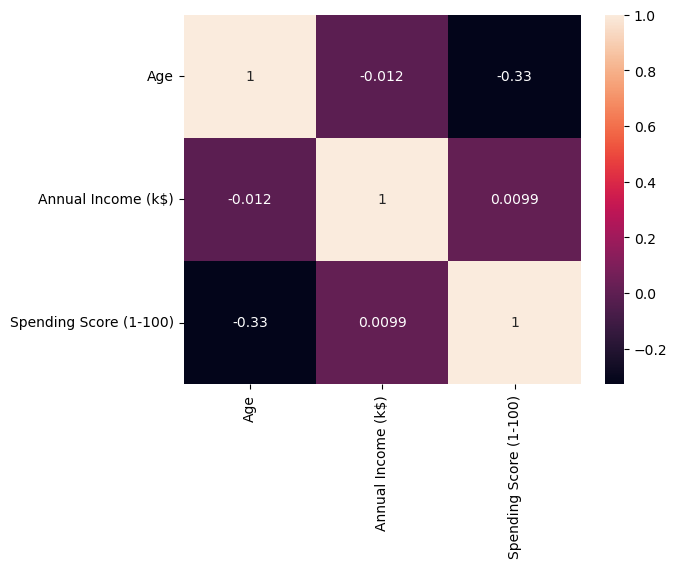

In [18]:
# creating a correlation heatmap
# создание корреляционной тепловой карты

sns.heatmap(df2.corr(), annot=True)

## Clustering – Univariate, Bivariate

#### Кластеризация – одномерная, двумерная

In [208]:
# creating a list with number of clusters, inertia scores and silhouette scores
# creating a model for univariate clusterization
# создание списка с количеством кластеров, оценками инерции и оценками силуэта
# создание модели для одномерной кластеризации

cluster_numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_scores = []
silhouette_scores = []

for i in cluster_numbers:
    kmeans = KMeans(n_clusters=i).fit(df2[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)
    
    silhouette_avg = silhouette_score(df2[['Annual Income (k$)']], kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

###### Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
##### Silhouette Score is a metric to evaluate the performance of clustering algorithm. It uses compactness of individual clusters(intra cluster distance) and separation amongst clusters (inter cluster distance) to measure an overall representative score of how well our clustering algorithm has performed.

In [209]:
# assigned clusters
# присвоенные кластеры

kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [210]:
inertia_scores

[48660.88888888889,
 23517.330930930926,
 13278.112713472488,
 8481.496190476191,
 5050.904761904763,
 3931.988095238096,
 2822.4996947496943,
 2208.812049062049,
 1746.4707792207791]

In [211]:
silhouette_scores

[0.5622996282314814,
 0.5630778156006976,
 0.5584977520656282,
 0.5836461109257968,
 0.6055386560072503,
 0.6143340926557819,
 0.6092272654893595,
 0.6154239424042652,
 0.6157599365025156]

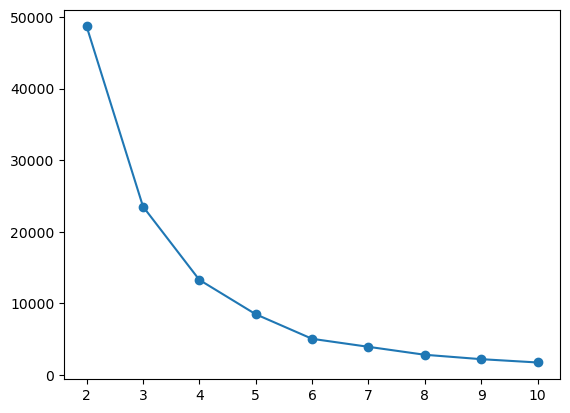

In [212]:
# elbow method for choosing optimal amount of clusters
# метод локтя для определения оптимального количества кластеров

plt.plot(cluster_numbers, inertia_scores, marker='o')

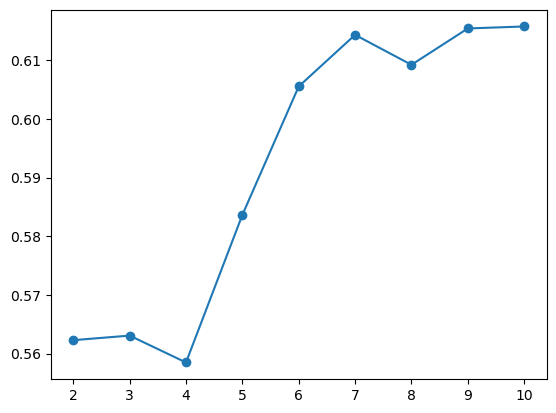

In [213]:
# silhouette score method for choosing optimal amount of clusters
# метод оценки силуэта для определения оптимального количества кластеров

plt.plot(cluster_numbers, silhouette_scores, marker='o')

In [223]:
# based on elbow method we deciced to keep 6 clusters
# исходя из метода локтя мы генерируем 6 кластеров

kmeans_uni = KMeans(n_clusters=6).fit(df2[['Annual Income (k$)']])

In [249]:
# double-checking inertia score to see that we chose needed amount of clusters
# еще раз проверяем, что было выбрано правильное количество кластеров

kmeans_uni.inertia_

5050.904761904763

In [234]:
# assigned clusters
# присвоенные кластеры

kmeans_uni.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 5], dtype=int32)

In [235]:
# creating a column with the number of cluster assigned
# создаем колонку с присвоенным номером кластера

df2['Income Cluster'] = kmeans_uni.labels_
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,4,3
2,Female,20,16,6,4,2
3,Female,23,16,77,4,3
4,Female,31,17,40,4,2
...,...,...,...,...,...,...
195,Female,35,120,79,5,4
196,Female,45,126,28,5,0
197,Male,32,126,74,5,4
198,Male,32,137,18,5,0


In [236]:
# counting the number of persons in each cluster
# подсчитываем количество человек в каждом кластере

df2['Income Cluster'].value_counts()

3    48
0    42
1    42
4    32
2    28
5     8
Name: Income Cluster, dtype: int64

In [240]:
# percentage of each gender
# процентное соотношение представителей каждого пола

pd.crosstab(df2['Income Cluster'], df2['Gender'], normalize='index')

Gender,Female,Male
Income Cluster,,
0,0.642857,0.357143
1,0.523810,0.476190
2,0.500000,0.500000
3,0.562500,0.437500
4,0.562500,0.437500
5,0.500000,0.500000


In [241]:
# displaying mean numeric values for each cluster
# отображение средних числовых значений для каждого кластера

df2.groupby('Income Cluster', as_index=False)['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'] \
                                                                                                        .mean()

,Income Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,43.000000,42.238095,50.666667
1,1,35.428571,75.095238,51.095238
2,2,38.214286,93.000000,50.928571
3,3,41.604167,60.083333,49.041667
4,4,34.906250,22.000000,49.656250
5,5,36.500000,124.000000,49.625000


## Bivariate Clustering

#### Двумерная кластеризация

In [242]:
# creating a list with number of clusters, inertia scores and silhouette scores
# creating a model for bivariate clusterization
# создание списка с количеством кластеров, оценками инерции и оценками силуэта
# создание модели для двумерной кластеризации

cluster_numbers_2 = [2, 3, 4, 5, 6, 7, 8, 9, 10]
inertia_scores_2 = []
silhouette_scores_2 = []

for i in cluster_numbers_2:
    kmeans_2 = KMeans(n_clusters=i).fit(df2[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores_2.append(kmeans_2.inertia_)
    
    silhouette_avg_2 = silhouette_score(df2[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans_2.labels_)
    silhouette_scores_2.append(silhouette_avg_2)

In [243]:
# assigned clusters
# присвоенные кластеры

kmeans_2.labels_

array([1, 8, 5, 8, 1, 8, 5, 3, 5, 8, 5, 3, 5, 8, 5, 8, 1, 8, 1, 3, 1, 8,
       5, 8, 5, 8, 1, 8, 1, 3, 5, 8, 5, 3, 5, 8, 5, 8, 1, 8, 1, 3, 1, 9,
       1, 9, 9, 9, 1, 1, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 4, 4, 9, 9, 9, 9,
       9, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 6, 7, 4, 7, 6, 7, 6, 7,
       4, 7, 6, 7, 6, 7, 6, 7, 6, 7, 4, 7, 6, 7, 4, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 7, 6, 7, 4, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [244]:
inertia_scores_2

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.8862365895,
 30241.343617936585,
 25022.485004530354,
 21797.084944646376,
 20283.330767420986]

In [245]:
silhouette_scores_2

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5376203956398481,
 0.5288104473798049,
 0.4572211842776841,
 0.4607224274992025,
 0.44176975798844226]

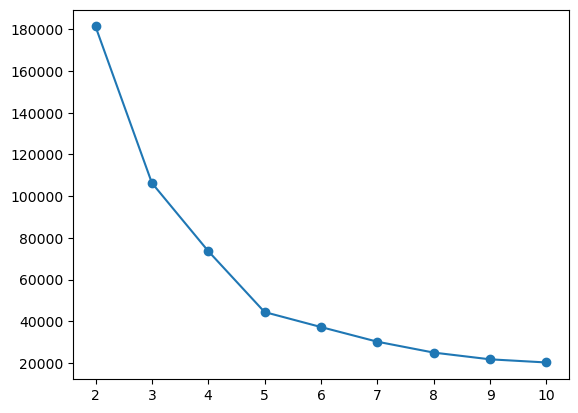

In [246]:
# elbow method for choosing optimal amount of clusters
# метод локтя для определения оптимального количества кластеров

plt.plot(cluster_numbers_2, inertia_scores_2, marker='o')

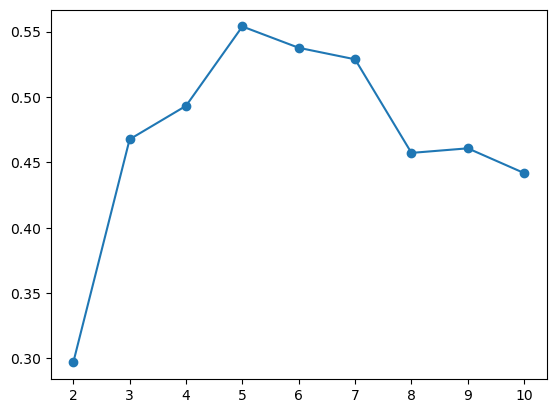

In [247]:
# silhouette score method for choosing optimal amount of clusters
# метод оценки силуэта для определения оптимального количества кластеров

plt.plot(cluster_numbers_2, silhouette_scores_2, marker='o')

In [248]:
# based on elbow method & silhouette score method we deciced to keep 5 clusters
# исходя из метода локтя и метода оценки силуэта мы генерируем 5 кластеров

kmeans_bi = KMeans(n_clusters=5).fit(df2[['Annual Income (k$)', 'Spending Score (1-100)']])

In [250]:
# double-checking inertia score to see that we chose needed amount of clusters
# еще раз проверяем, что было выбрано правильное количество кластеров

kmeans_bi.inertia_

44448.45544793371

In [251]:
# assigned clusters
# присвоенные кластеры

kmeans_bi.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [252]:
# creating a column with the number of cluster assigned
# создаем колонку с присвоенным номером кластера

df2['Spending and Income Cluster'] = kmeans_bi.labels_
df2

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,4
1,Male,21,15,81,4,3
2,Female,20,16,6,4,4
3,Female,23,16,77,4,3
4,Female,31,17,40,4,4
...,...,...,...,...,...,...
195,Female,35,120,79,5,1
196,Female,45,126,28,5,2
197,Male,32,126,74,5,1
198,Male,32,137,18,5,2


In [253]:
# counting the number of persons in each cluster
# подсчитываем количество человек в каждом кластере

df2['Spending and Income Cluster'].value_counts()

0    81
1    39
2    35
4    23
3    22
Name: Spending and Income Cluster, dtype: int64

In [254]:
# percentage of each gender
# процентное соотношение представителей каждого пола

pd.crosstab(df2['Spending and Income Cluster'], df2['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [255]:
# displaying mean numeric values for each cluster
# отображение средних числовых значений для каждого кластера

df2.groupby('Spending and Income Cluster', as_index=False)['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'] \
                                                                                                        .mean()

,Spending and Income Cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,42.716049,55.296296,49.518519
1,1,32.692308,86.538462,82.128205
2,2,41.114286,88.200000,17.114286
3,3,25.272727,25.727273,79.363636
4,4,45.217391,26.304348,20.913043


In [256]:
# defining centers of clusters
# определяем центры кластеров

centers = pd.DataFrame(kmeans_bi.cluster_centers_)
centers.columns = ['x', 'y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

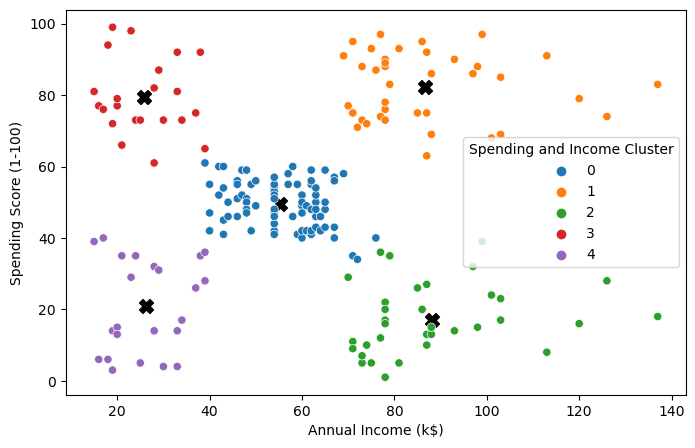

In [257]:
# visualization of bivariate clustering
# визуализация двумерной кластеризации

plt.figure(figsize=(8,5))
plt.scatter(x=centers.x, y=centers.y, s=100, c='black',marker='X')
sns.scatterplot(data=df2, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Spending and Income Cluster', palette='tab10')

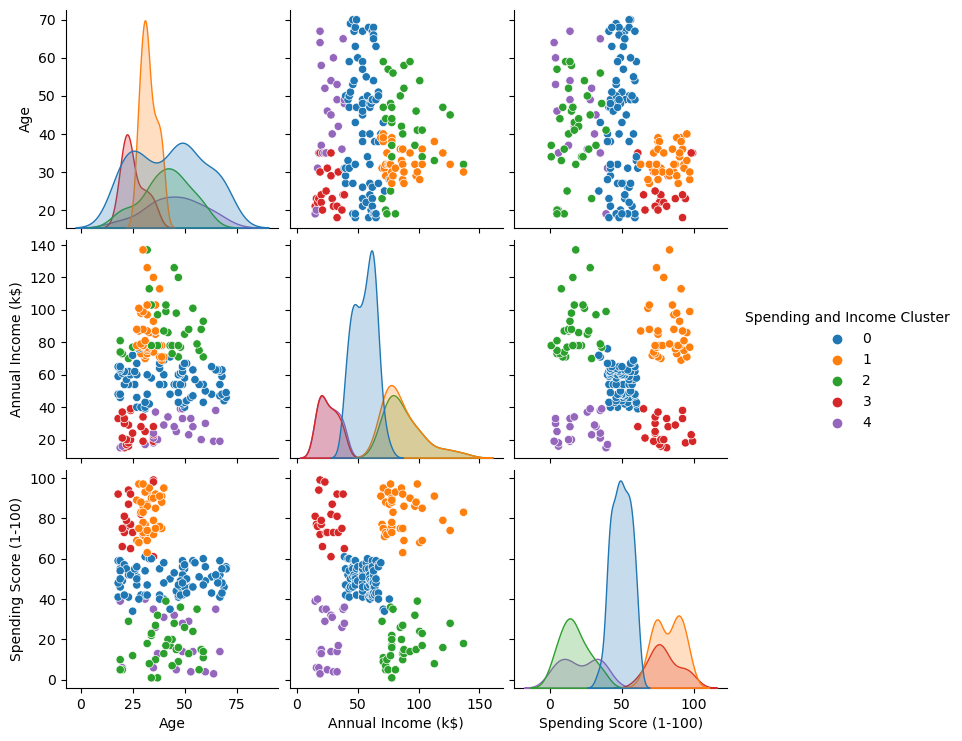

In [262]:
# visualization of pairplots between numeric values with cluster filtering
# визулизация парных графиков числовых значений с фильтрацией по кластеру

sns.pairplot(df2[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 
                  'Spending and Income Cluster']], hue='Spending and Income Cluster', palette='tab10')
plt.show()